# Fichier de traitement des données Spotify

In [792]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: okabeshu
"""
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from operator import itemgetter, attrgetter

# Importer les données

In [793]:
# DataFrame des playlists
playlists_tout = pd.read_csv("/Users/okabeshu/Documents/ENSAE/Python DS/playlists.csv", encoding = "utf-8")
playlists = playlists_tout[playlists_tout["followers"] >= 300000] # Playlists gardées

# Données sur les chansons de playlists les plus suivies
spotify = pd.read_csv("/Users/okabeshu/Documents/ENSAE/Python DS/Spotify.csv")
spotify_t = spotify[spotify["tempo"] > 0]

In [1217]:
# Découper les données
train, test = train_test_split(spotify_t)
train_sauve = train.copy() # Sauvegarde de train

In [1218]:
# Extraits
train.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence
13659,0.1940,VALNTN,0.504,180894,0.446,0.000001,10,0.346,-9.127,0,Chill Vibes,59,0.2290,129.126,4,Can't Let Go (feat. Emilia Ali),spotify:track:7sXg1VmdnM1Ho3aJPya5SC,0.281
5932,0.9920,Johann Sebastian Bach,0.318,92560,0.229,0.897000,7,0.163,-23.055,1,Intense Studying,47,0.0411,129.221,3,"Aria mit 30 Veränderungen, BWV 988 ""Goldberg V...",spotify:track:0XA5P6VyFHDdVH40vD0oFW,0.937
1008,0.0297,The Weeknd,0.514,220307,0.674,0.000025,8,0.187,-6.437,0,This Is: The Weeknd,65,0.0750,173.988,4,False Alarm,spotify:track:09FhDfmrSDN162X1yFfapI,0.184
3215,0.3810,Niall Horan,0.519,223044,0.554,0.000000,0,0.115,-6.412,1,Soft Pop Hits,79,0.0385,153.676,4,Too Much To Ask,spotify:track:4v094LQ9eF10k2O2Te2ngK,0.194
3234,0.2170,Train,0.675,216667,0.885,0.000000,1,0.086,-4.432,0,Soft Pop Hits,77,0.0436,97.030,4,"Hey, Soul Sister",spotify:track:0KpfYajJVVGgQ32Dby7e9i,0.768


In [796]:
test.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence
9859,0.94200,Bon Iver,0.379,336613,0.306,0.323,1,0.1230,-14.446,1,Relax & Unwind,68,0.0305,147.902,4,Holocene,spotify:track:05lBuZWQ2OhQuzoCSIkvUF,0.157
13406,0.64000,Minke,0.723,261693,0.539,0.526,7,0.0819,-9.385,0,Indie Chillout.,59,0.0380,99.996,4,Gold Angel,spotify:track:6NaRzSvVxqv2DC2eg039gB,0.123
4045,0.00174,Andrea Oliva,0.478,236098,0.357,0.964,0,0.1490,-15.297,1,Deep House Relax,49,0.0563,123.026,4,Stringnumber,spotify:track:1CHr336YZ3zEfss03mahMa,0.155
3029,0.10600,Anthony Brown & group therAPy,0.630,257093,0.900,0.000,2,0.3310,-5.548,1,Spread the Gospel,46,0.2320,165.923,4,Testimony,spotify:track:37PMWc1U9QTGRSh9cKzvDj,0.769
6171,0.84100,Hozier,0.624,246500,0.214,0.000,2,0.7010,-9.471,0,Acoustic Love,58,0.0457,125.149,3,"Take Me To Church - Live From Spotify, London ...",spotify:track:61IautUH8F8UWJ0kxF9pJc,0.300


# Informations générales sur les bases de données

In [797]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 10977 to 11665
Data columns (total 18 columns):
acousticness        12664 non-null float64
artist              12664 non-null object
danceability        12664 non-null float64
duration_ms         12664 non-null int64
energy              12664 non-null float64
instrumentalness    12664 non-null float64
key                 12664 non-null int64
liveness            12664 non-null float64
loudness            12664 non-null float64
mode                12664 non-null int64
playlist_name       12664 non-null object
popularity          12664 non-null int64
speechiness         12664 non-null float64
tempo               12664 non-null float64
time_signature      12664 non-null int64
title               12664 non-null object
uri                 12664 non-null object
valence             12664 non-null float64
dtypes: float64(9), int64(5), object(4)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4222 entries, 9

In [798]:
# Description des variables quantitatives
train.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence
count,12664.000000,12664.000000,1.266400e+04,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.00000,12664.000000,12664.000000
mean,0.342029,0.575725,2.339803e+05,0.569445,0.170697,5.134318,0.168215,-9.091972,0.644820,57.190540,0.075467,118.34446,3.922378,0.430895
std,0.348748,0.170806,9.087963e+04,0.259627,0.323227,3.575878,0.135353,5.615126,0.478587,13.929798,0.078901,28.71195,0.383121,0.251005
min,0.000003,0.058000,2.317300e+04,0.000234,0.000000,0.000000,0.014500,-44.401000,0.000000,0.000000,0.022900,31.08400,1.000000,0.023800
25%,0.032300,0.470000,1.924270e+05,0.387000,0.000000,2.000000,0.093200,-10.920000,0.000000,48.000000,0.034700,96.96000,4.000000,0.223000
50%,0.192000,0.589000,2.205380e+05,0.606000,0.000173,5.000000,0.115000,-7.488500,1.000000,57.000000,0.045200,118.02300,4.000000,0.410000
75%,0.656000,0.697000,2.564032e+05,0.782000,0.088650,8.000000,0.189000,-5.356000,1.000000,67.000000,0.074600,135.59600,4.000000,0.619000
max,0.996000,0.980000,3.391040e+06,0.999000,0.993000,11.000000,0.987000,0.088000,1.000000,100.000000,0.802000,232.08000,5.000000,0.989000


In [799]:
# Description des variables qualitatives
train.describe(include = ["O"])

,artist,playlist_name,title,uri
count,12664,12664,12664,12664
unique,5325,252,9176,10008
top,Ed Sheeran,#ThrowbackThursday,Dreamer,spotify:track:7iDa6hUg2VgEL1o1HjmfBn
freq,64,85,15,11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138602748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13ef07b00>]], dtype=object)

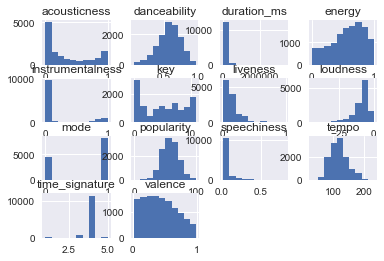

In [800]:
# Histogrammes par catégorie
train.hist()

# Étudier les doublons
Certaines chansons sont enregistrées dans plusieurs playlists. On a donc les mêmes informations musicales mais pas le même nom de playlist. Ce qui est intéressant dans ces chansons "répétées", c'est qu'elles sont souvent suffisamment populaires pour être dans plusieurs playlists différentes ; on peut donc en faire une indicatrice.

In [999]:
# Indicatrice pour les répétitions des chansons (même chanson sur des playlists différentes)
def creer_repet (donnees) : 
    data = donnees.copy()
    data["rep"] = donnees.duplicated("uri", False) # Repérer tous les doublons
    data["repet"] = 0
    data.loc[data["rep"] == True, "repet"] = 1 
    data = data.drop("rep", axis = 1)
    return data

train_r = creer_repet(train)
train_r.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence,repet
13979,0.000172,Trapt,0.492,285570,0.896,0.000003,4,0.1890,-5.819,0,Rock the 2000s,74,0.1170,184.981,4,Headstrong,spotify:track:1AEYT6VxrxXPMoQUxsY0E4,0.534,1
6343,0.024900,Britney Spears,0.774,198800,0.838,0.025000,5,0.2420,-3.914,0,#ThrowbackThursday,75,0.1140,143.040,4,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.924,1
3135,0.075900,Tevin Campbell,0.658,284587,0.711,0.000018,2,0.0446,-7.424,0,I Love My '90s R&B,55,0.0425,172.365,4,Can We Talk,spotify:track:5vXEj2R1LZFG4D5U70jXnz,0.614,0
15223,0.826000,Tep No,0.528,189071,0.427,0.000000,11,0.1220,-8.926,0,Autumn Leaves,49,0.0347,141.866,4,Safe Dream,spotify:track:0Ffg0etsfpaUNwv8t0bosp,0.195,0
3670,0.006100,Fritz Kalkbrenner,0.678,313085,0.552,0.000773,6,0.0977,-12.340,1,Chill Tracks,55,0.0848,103.994,4,Facing the Sun,spotify:track:4Ei691AKbjiGscPcMUdA4s,0.421,0


# Étudier le titre des playlists
Étudions donc plus en détail le titre des playlists.

In [1000]:
# Chercher les noms des playlists qui contiennent un mot en particulier
def chercher_playlist (playlists, mot) :
    titres = []
    for index, ligne in playlists.iterrows() :
        nom = ligne["playlist_name"]
        mots = nom.split(" ")
        if mot in mots :
            titres += [nom]
    return titres

# Éviter les confusions entre Classic et Classical
classic = chercher_playlist (playlists_tout, "Classic")
classical = chercher_playlist (playlists_tout, "Classical")
print("Classic :", classic, "\n \n Classical :", classical)

Classic : ['Classic Hardcore', 'Classic Honky Tonk', 'Classic Covers', 'Classic Acoustic', 'Classic Oldies Stroll', 'Classic Punk', 'Classic Soul With Seth Rogen', 'Classic Road Trip Songs'] 
 
 Classical : ['Classical New Releases: Spotify Picks', 'Winter Classical', 'Spring Classical', 'Classical Halloween', 'Top Classical of 2017', 'Classical X', 'Early Classical', 'Top Latin Classical', 'Space-themed Classical Music', 'Classical Romance', 'Jazz – Classical Crossings', 'Epic Classical', 'Classical Essentials', 'Classical Dance Music: Ballet & Beyond', 'Classical Café', 'Classical Guitar 50: Spotify Picks', "Classical Music Explained: Bernstein's Music Lectures & More", 'Next Classical', 'Classical Feast', 'Classical Intimate Dinner', 'Women of Classical', 'Contemporary Chinese Classical', 'Classical Moments in Movies', 'Top Picks Classical', 'Classical Music for Smart Kids']


Il s'agit là d'une fonction pour connaître les noms des playlists contenant un certain mot. Ici, l'exemple nous permet de savoir, en cas de doute, lequel des deux mots fait référence à la musique classique.

In [1059]:
# Avoir tous les mots des titres (catégorie d'une variable)
def tous_titres (donnees, variable) : 
    mot_titres_playlists = []
    for index, ligne in donnees.iterrows() :
        nom = ligne[variable]
        mots = nom.split(" ")
        mot_titres_playlists += mots
    return mot_titres_playlists

tous_play_sans = tous_titres(playlists, "playlist_name")
#print(tous_play_sans)

In [1002]:
# Compter les occurrences des mots sans "pondération"
compteur_mots_sans = {i : tous_play_sans.count(i) for i in set(tous_play_sans)}
#print(compteur_mots_sans)

In [1003]:
# Compter les occurrences des mots avec "pondération" (nombre de chansons par playlist)
tous_mots_playlists = tous_titres(train, "playlist_name")
compteur_mots_playlists = {i : tous_mots_playlists.count(i) for i in set(tous_mots_playlists)}
#print(compteur_mots_playlists)

,occurrence
count,372.000000
mean,85.607527
std,107.979866
min,15.000000
25%,36.000000
50%,52.000000
75%,80.000000
max,803.000000


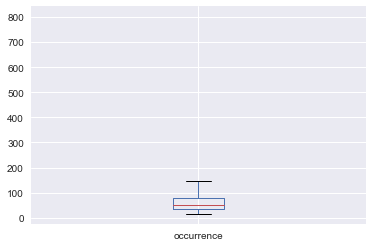

In [1004]:
# Étudier les occurrences des mots dans les titres de playlists
compteur = pd.DataFrame(list(compteur_mots_playlists.items()), columns = ["mot", "occurrence"])
compteur.plot(kind = "box")
compteur.describe()

In [1005]:
compteur = compteur.set_index("mot")
compteur.head()

,occurrence
mot,
Funk,40
Baby,37
Martin,31
Chill-Out,35
Forever,142


In [1006]:
# On supprime quelques mots vides et symboles comme of, &, ...
mots_inutiles = ["&", "|", "+", "-", "–", "of", "on", "as", "to", "in", "and", "a", "the", "The", "On", "Of", "In", "Out", "Is:", "This"]
def filtre_stop_word (occurrence, mots) : # L'index doit être les mots inutiles prédéfinis
    for X in mots :
        try :
            occurrence = occurrence.drop(X)
        except : 
            pass
    return occurrence

compt = filtre_stop_word (compteur, mots_inutiles)
compt.head()

,occurrence
mot,
Funk,40
Baby,37
Martin,31
Chill-Out,35
Forever,142


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13dc9ce80>]], dtype=object)

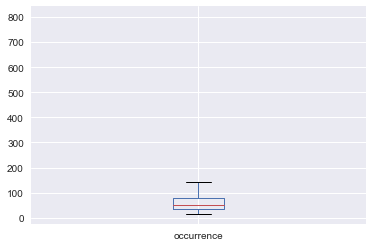

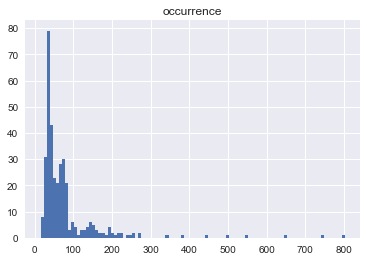

In [1007]:
compt.plot(kind = "box")
compt.hist(bins = 100)

In [1008]:
compt.describe()

,occurrence
count,352.000000
mean,78.238636
std,90.379226
min,15.000000
25%,35.750000
50%,51.000000
75%,79.000000
max,803.000000


In [1009]:
compt.quantile(.9) # 150

occurrence    156.0
Name: 0.9, dtype: float64

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


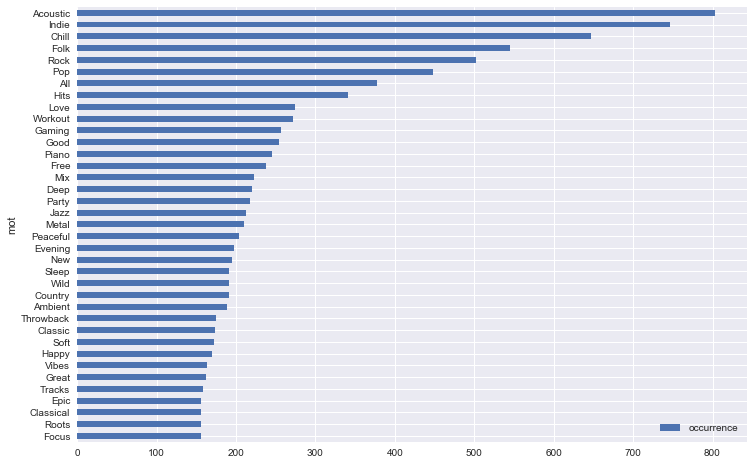

In [1064]:
# Regarder les mots les plus récurrents
compt_rec = compt[(compt["occurrence"] > 150)]
compt_rec.sort_values(by = "occurrence", inplace = True)
compt_rec.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

## Étude des genres musicaux 

In [1011]:
# Créer un tag pour les genres
genres = ["Rock", "Metal", "Indie", "Pop", "Jazz", "Country", "Folk", "Classical"] # Liste des genres
def themes (donnees, theme, variable, new_var) : 
    data = donnees.copy()
    data[new_var] = "Aucun"
    for index, ligne in data.iterrows() :
        nom = ligne[variable]
        mots = nom.split(" ")
        for x in mots : 
            if x in theme : 
                data.at[index, new_var] = x
    return data

train_g = themes(train_r, genres, "playlist_name", "genre")
train_g.head()

,acousticness,artist,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_name,popularity,speechiness,tempo,time_signature,title,uri,valence,repet,genre
13979,0.000172,Trapt,0.492,285570,0.896,0.000003,4,0.1890,-5.819,0,Rock the 2000s,74,0.1170,184.981,4,Headstrong,spotify:track:1AEYT6VxrxXPMoQUxsY0E4,0.534,1,Rock
6343,0.024900,Britney Spears,0.774,198800,0.838,0.025000,5,0.2420,-3.914,0,#ThrowbackThursday,75,0.1140,143.040,4,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.924,1,Aucun
3135,0.075900,Tevin Campbell,0.658,284587,0.711,0.000018,2,0.0446,-7.424,0,I Love My '90s R&B,55,0.0425,172.365,4,Can We Talk,spotify:track:5vXEj2R1LZFG4D5U70jXnz,0.614,0,Aucun
15223,0.826000,Tep No,0.528,189071,0.427,0.000000,11,0.1220,-8.926,0,Autumn Leaves,49,0.0347,141.866,4,Safe Dream,spotify:track:0Ffg0etsfpaUNwv8t0bosp,0.195,0,Aucun
3670,0.006100,Fritz Kalkbrenner,0.678,313085,0.552,0.000773,6,0.0977,-12.340,1,Chill Tracks,55,0.0848,103.994,4,Facing the Sun,spotify:track:4Ei691AKbjiGscPcMUdA4s,0.421,0,Aucun


In [1012]:
# Nettoyer la base de données grâce au genre musical
def nettoyer (donnees) :
    df = donnees.drop_duplicates(["uri", "genre"]) # Enlever les doublons
    train = df.drop(["uri", "playlist_name", "title", "artist"], axis = 1)
    train = pd.get_dummies(train)
    train = train.sort_values(by = "genre_Aucun", ascending = True)
    train = train.drop("genre_Aucun", axis = 1)
    train["uri"] = df["uri"]
    train["playlist_name"] = df["playlist_name"]
    train["title"] = df["title"]
    train["artist"] = df["artist"]
    train = train.drop_duplicates(["uri"]) # Supprimer les derniers doublons
    return train

train_n = nettoyer(train_g)
train_g.shape, train_n.shape

((12664, 20), (10025, 27))

In [1013]:
train_pass = train_n.drop(["repet", "genre_Classical", "genre_Country", "genre_Folk", "genre_Indie", 
                        "genre_Jazz", "genre_Metal", "genre_Pop", "genre_Rock"], axis = 1)
train_pass.shape # Mêmes variables que train_sauve

(10025, 18)

In [1014]:
train = themes(creer_repet(train_pass), genres, "playlist_name", "genre")
train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,uri,playlist_name,title,artist,repet,genre
13979,0.000172,0.492,285570,0.8960,0.000003,4,0.189,-5.819,0,74,0.1170,184.981,4,0.534,spotify:track:1AEYT6VxrxXPMoQUxsY0E4,Rock the 2000s,Headstrong,Trapt,0,Rock
1568,0.006410,0.444,340667,0.7020,0.000008,6,0.217,-6.799,1,48,0.0608,148.096,4,0.270,spotify:track:00WXjbcR195RztyuAQ90ub,Nu Metal,Rapture,Hurt,0,Metal
6692,0.984000,0.159,462627,0.0401,0.760000,7,0.156,-27.516,1,47,0.0446,106.239,4,0.106,spotify:track:67TCAXIe154ZGDNaWceqxC,Classical Essentials,"String Quartet No. 62 in C Major, Op. 76, No. ...",Franz Joseph Haydn,0,Classical
11718,0.006970,0.735,197750,0.7980,0.009680,9,0.194,-3.829,0,52,0.0578,115.980,4,0.501,spotify:track:5jRJlGB5EP7HFKwYBKvlSA,Essential Indie,Fire,Diskopunk,0,Indie
8704,0.000387,0.590,199893,0.8940,0.000661,4,0.269,-3.661,0,72,0.0579,90.604,4,0.732,spotify:track:0SjhCnjTT2bXD9RtU8bFT9,Metal Essentials,Last Resort,Papa Roach,0,Metal


In [817]:
train["genre"].value_counts()

Aucun        7728
Rock          454
Pop           439
Indie         368
Folk          352
Jazz          186
Metal         180
Country       158
Classical     143
Name: genre, dtype: int64

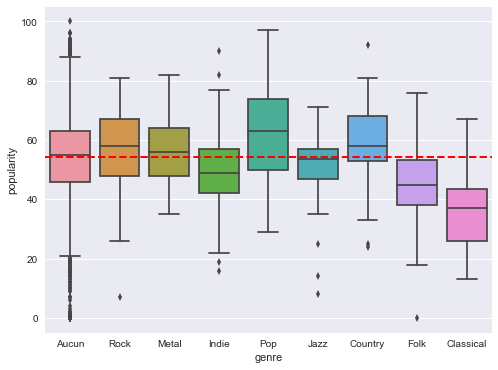

In [818]:
# Boxplot genre et popularité
a_tester = pd.concat([train["popularity"], train["genre"]], axis = 1)
plt.subplots(figsize = (8, 6))
sns.boxplot(x = "genre", y = "popularity", data = a_tester, order = ["Aucun", "Rock", "Metal", "Indie", "Pop", "Jazz", "Country", "Folk", "Classical"])
plt.axhline(a_tester["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)

On remarque que :
* Le genre "Pop" est très populaire par rapport aux autres genres, ce qui est conforme aux tendances réelles.
* De la même façon, la musique classique est très peu populaire sur Spotify.

## Étude de mots populaires

In [1068]:
# Créer un tag pour les autres mots populaires
train_th = themes(train, ["Acoustic", "Chill", "Piano", "All", "Good", "Love", "Party", "Sleep", "Hits"], "playlist_name", "themes")
train_th.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,...,tempo,time_signature,valence,uri,playlist_name,title,artist,repet,genre,themes
13979,0.000172,0.492,285570,0.8960,0.000003,4,0.189,-5.819,0,74,...,184.981,4,0.534,spotify:track:1AEYT6VxrxXPMoQUxsY0E4,Rock the 2000s,Headstrong,Trapt,0,Rock,Aucun
1568,0.006410,0.444,340667,0.7020,0.000008,6,0.217,-6.799,1,48,...,148.096,4,0.270,spotify:track:00WXjbcR195RztyuAQ90ub,Nu Metal,Rapture,Hurt,0,Metal,Aucun
6692,0.984000,0.159,462627,0.0401,0.760000,7,0.156,-27.516,1,47,...,106.239,4,0.106,spotify:track:67TCAXIe154ZGDNaWceqxC,Classical Essentials,"String Quartet No. 62 in C Major, Op. 76, No. ...",Franz Joseph Haydn,0,Classical,Aucun
11718,0.006970,0.735,197750,0.7980,0.009680,9,0.194,-3.829,0,52,...,115.980,4,0.501,spotify:track:5jRJlGB5EP7HFKwYBKvlSA,Essential Indie,Fire,Diskopunk,0,Indie,Aucun
8704,0.000387,0.590,199893,0.8940,0.000661,4,0.269,-3.661,0,72,...,90.604,4,0.732,spotify:track:0SjhCnjTT2bXD9RtU8bFT9,Metal Essentials,Last Resort,Papa Roach,0,Metal,Aucun


In [1069]:
train_th["themes"].value_counts()

Aucun       7631
Acoustic     534
Chill        460
All          298
Love         225
Hits         213
Piano        207
Good         183
Sleep        155
Party        119
Name: themes, dtype: int64

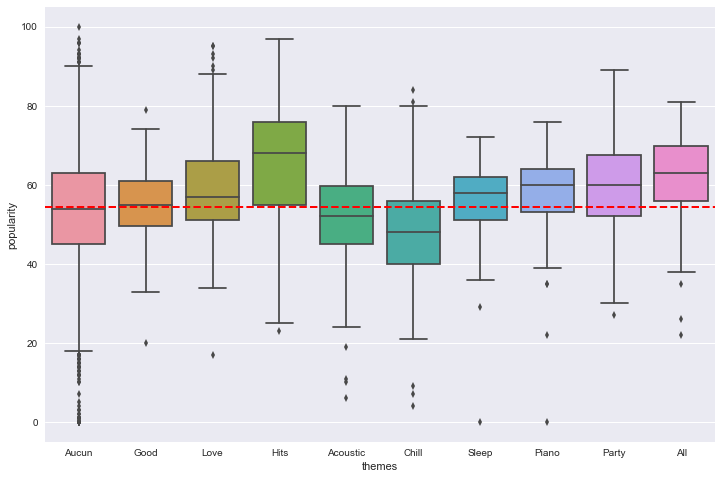

In [1070]:
# Créer un boxplot entre une variable (ici, le thème) et popularité
def boxploter (donnees, variable) : 
    a_tester = pd.concat([donnees["popularity"], donnees[variable]], axis = 1)
    plt.subplots(figsize = (12, 8))
    sns.boxplot(x = variable, y = "popularity", data = a_tester)
    plt.axhline(a_tester["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)
    
boxploter(train_th, "themes")

### On constate ici que :
* Les chansons considérées comme "Hits" sont bien populaires sur Spotify.
* Les chansons sur le thème de l'amour ou les chansons qualifiées de "Good" ne sont pas spécialement populaires.
* Les chansons pour s'endormir sont assez populaires en revanche. 

# Études des différentes variables

In [822]:
# Extraire les différentes catégories
acoustic = train["acousticness"]
dance = train["danceability"]
duration = train["duration_ms"]
energy = train["energy"]
instru = train["instrumentalness"]
key = train["key"]
live = train["liveness"]
loud = train["loudness"]
mode = train["mode"]
pop = train["popularity"]
speech = train["speechiness"]
tempo = train["tempo"]
time = train["time_signature"]
valence = train["valence"]

## Acousticness
Il s'agit d'une variable numérique indiquant si la chanson est acoustique ou non.

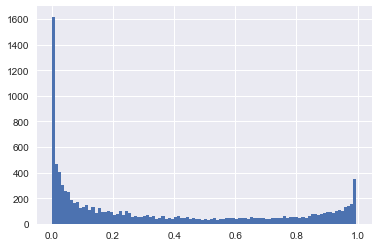

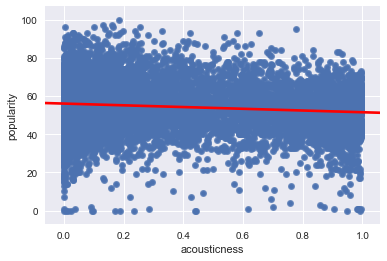

In [823]:
acoustic.hist(bins = 100)
train.plot(kind = "scatter", x = "acousticness", y = "popularity")
sns.regplot("acousticness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Danceability
Il s'agit d'une variable numérique quantifiant à quel point la chanson est adaptée à la danse.

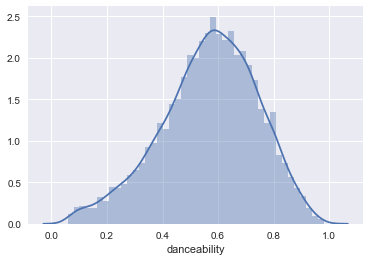

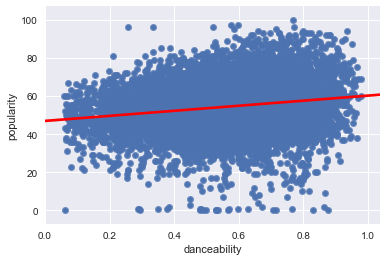

In [824]:
sns.distplot(train["danceability"])
train.plot(kind = "scatter", x = "danceability", y = "popularity")
sns.regplot("danceability", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Durée des morceaux (en ms)

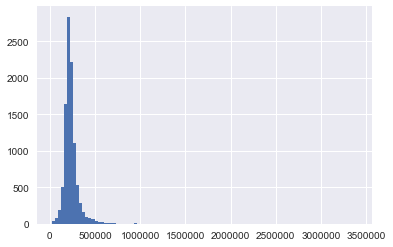

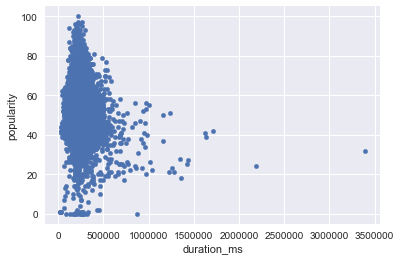

In [825]:
duration.hist(bins = 100)
train.plot(kind = "scatter", x = "duration_ms", y = "popularity")

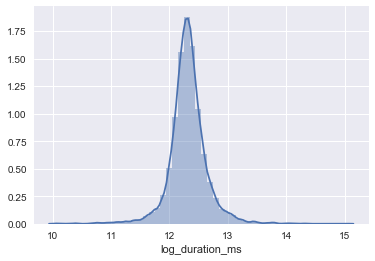

In [826]:
# On prend le logarithme 
train_l = train.copy()
train_l["log_duration_ms"] = np.log(train["duration_ms"])
sns.distplot(train_l["log_duration_ms"])

## Energy
Cette variable quantifie l'énergie ressentie en écoutant la musique.

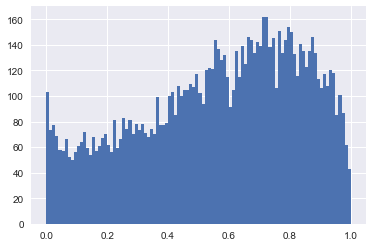

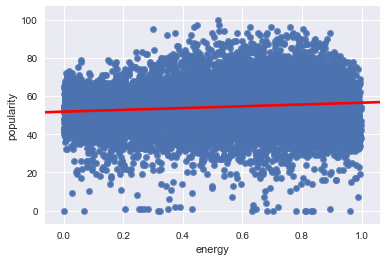

In [827]:
energy.hist(bins = 100)
train.plot(kind = "scatter", x = "energy", y = "popularity")
sns.regplot("energy", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Instrumentalness
C'est une variable qui prédit si le morceau contient du chant ou non. Plus la valeur est proche de 1, plus il y a de chances qu'il n'y ait pas de chant.

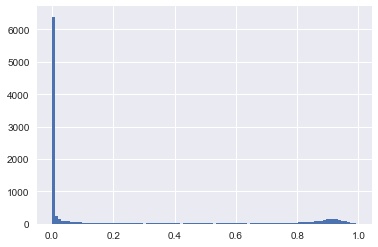

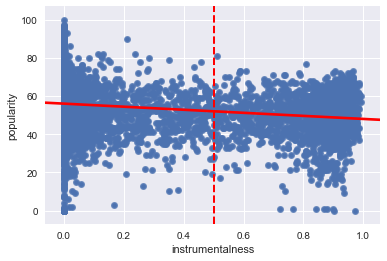

In [828]:
instru.hist(bins = 100)
train.plot(kind = "scatter", x = "instrumentalness", y = "popularity")
plt.axvline(0.5, color = "r", linestyle = "dashed", linewidth = 2) # 0.5 selon la notice pour instrumental ou non
sns.regplot("instrumentalness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

count    3609.000000
mean        0.539039
std         0.368978
min         0.010100
25%         0.110000
50%         0.683000
75%         0.892000
max         0.993000
Name: instrumentalness, dtype: float64

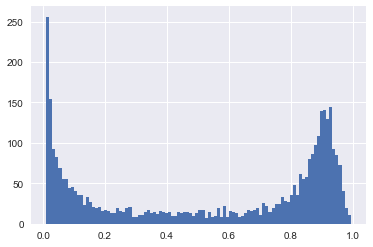

In [829]:
# Pour mieux voir sans les pics entre 0 et 0.01
instr = instru[instru > 0.01]
instr.hist(bins = 100)
instr.describe()

## Tonalité des morceaux

0     1267
7     1096
1     1018
2      930
9      907
5      886
4      780
11     775
6      715
8      675
10     598
3      361
Name: key, dtype: int64

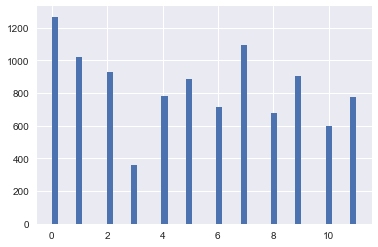

In [830]:
key.hist(bins = 50)
key.value_counts()

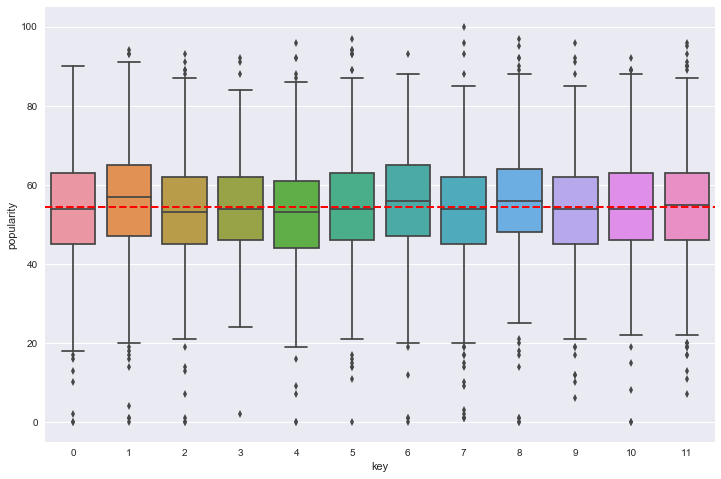

In [831]:
# Boxplot key et popularité
boxploter(train, "key")

On remarque que la tonalité du morceau n'influence que très peu sa popularité.

## Liveness
Cette variable permet de détecter si l'enregistrement du morceau s'est fait en live.

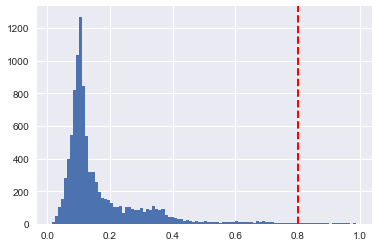

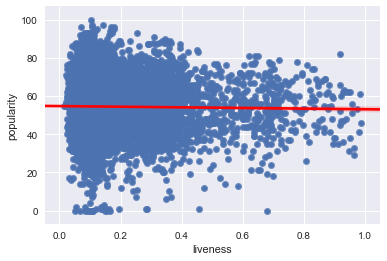

In [832]:
live.hist(bins = 100)
plt.axvline(0.8, color = "r", linestyle = "dashed", linewidth = 2) # Très probablement en live si live > 0.8
train.plot(kind = "scatter", x = "liveness", y = "popularity")
sns.regplot("liveness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Loudness
Il s'agit du volume global du morceau en décibels.

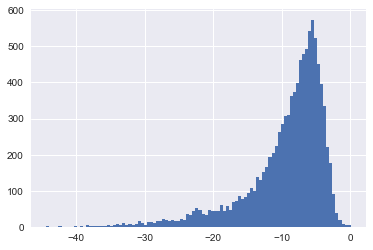

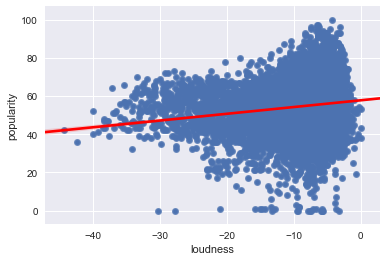

In [833]:
loud.hist(bins = 100)
train.plot(kind = "scatter", x = "loudness", y = "popularity")
sns.regplot("loudness", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

## Mode de la tonalité

1    6411
0    3597
Name: mode, dtype: int64

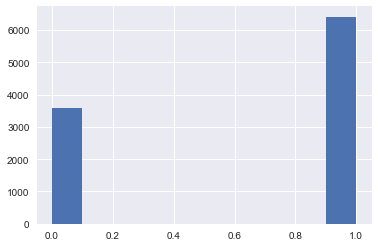

In [834]:
mode.hist()
mode.value_counts()

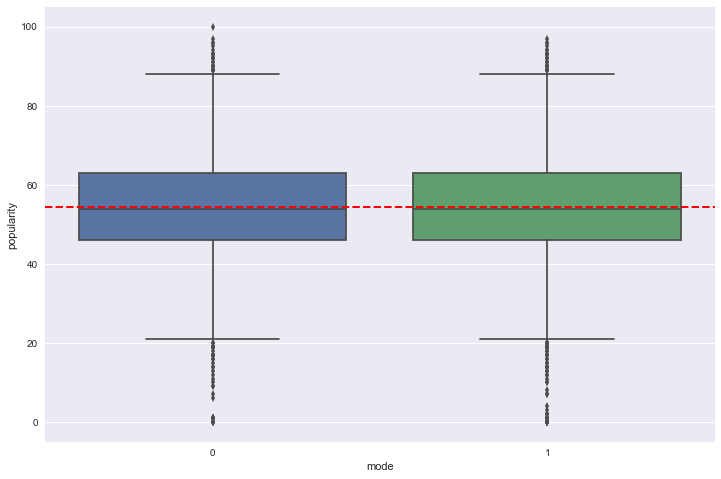

In [835]:
# Boxplot mode et popularité
boxploter(train, "mode")

Le mode de la chanson (majeur ou mineur) ne semble pas influencer la popularité de la chanson.

## Popularité

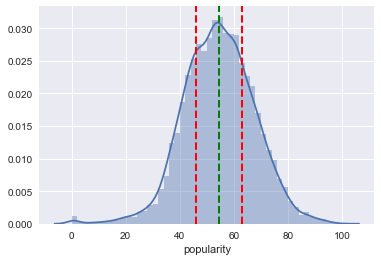

In [836]:
sns.distplot(train["popularity"])
plt.axvline(train["popularity"].quantile(0.25), color = "r", linestyle = "dashed", linewidth = 2) 
plt.axvline(train["popularity"].mean(), color = "g", linestyle = "dashed", linewidth = 2)
plt.axvline(train["popularity"].quantile(0.75), color = "r", linestyle = "dashed", linewidth = 2)

## Speechiness
Cette variable permet de détecter la présence de mots parlés dans le morceau.

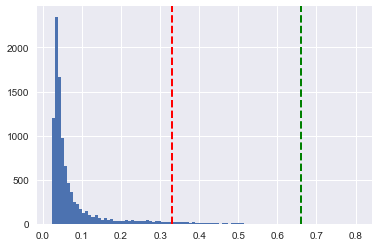

In [837]:
speech.hist(bins = 100)
plt.axvline(0.33, color = "r", linestyle = "dashed", linewidth = 2)
plt.axvline(0.66, color = "g", linestyle = "dashed", linewidth = 2)

## Tempo

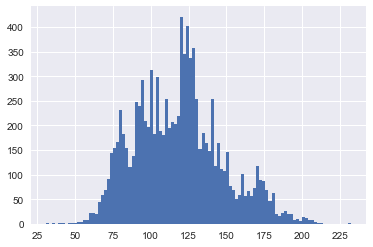

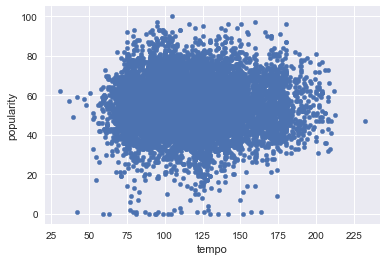

In [838]:
tempo.hist(bins = 100)
train.plot(kind = "scatter", x = "tempo", y = "popularity")

## Time signature
Il s'agit du nombre de pulsations par mesure dans la chanson.

4    8993
3     771
5     169
1      75
Name: time_signature, dtype: int64

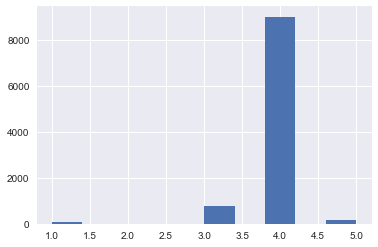

In [839]:
time.hist()
time.value_counts()

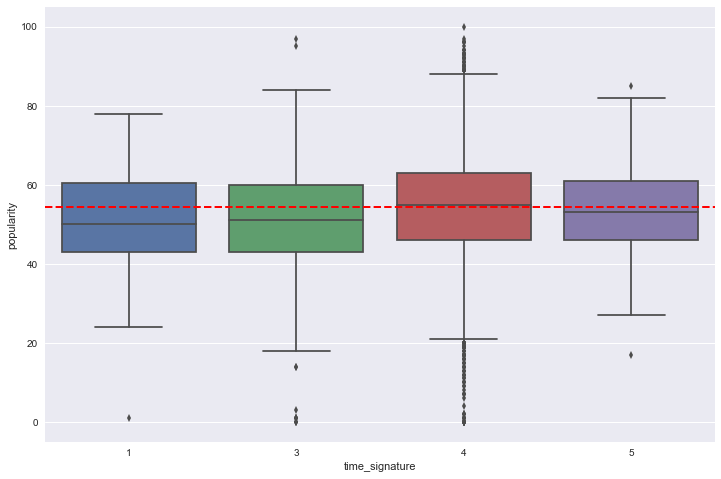

In [840]:
# Boxplot time_signature et popularité
boxploter(train, "time_signature")

## Valence
Cette variable quantifie la positivité musicale véhiculée par le morceau.

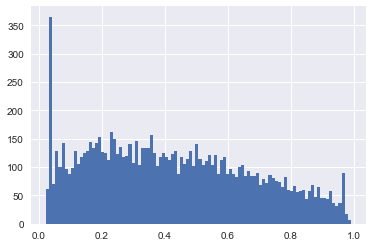

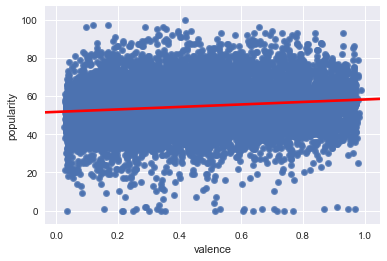

In [841]:
valence.hist(bins = 100)
train.plot(kind = "scatter", x = "valence", y = "popularity")
sns.regplot("valence", "popularity", data = train, fit_reg = True, line_kws = {"color": "red"})

# Étude des titres
En plus de l'étude des titres de playlists, on peut compléter l'analyse avec l'étude des titres en procédant de manière similaire.

In [1015]:
titres = tous_titres(train, "title")
compteur_mots_titres = {i : titres.count(i) for i in set(titres)}

In [1016]:
# Étudier les occurrences des mots dans les titres de chansons
compteur_t = pd.DataFrame(list(compteur_mots_titres.items()), columns = ["mot", "occurrence"])
compteur_t = compteur_t.set_index("mot")
compteur_t.describe()

,occurrence
count,8351.000000
mean,4.083822
std,23.963898
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1349.000000


In [1017]:
compteur_t.quantile(0.99)

occurrence    49.0
Name: 0.99, dtype: float64

In [1018]:
# Regarder les mots les plus récurrents
compt_rec_t = compteur_t[(compteur_t["occurrence"] > 60)]
compt_t = filtre_stop_word(compt_rec_t, mots_inutiles)
new_mots_inutiles = ["It", "Up", "Is", "A", "To", "For", "On", "That", "And", "for", "From", "With", "Back", "Down"]
compt_t = filtre_stop_word(compt_t, new_mots_inutiles)
compt_t.describe()

,occurrence
count,38.000000
mean,157.184211
std,136.627696
min,61.000000
25%,77.250000
50%,95.000000
75%,159.250000
max,650.000000


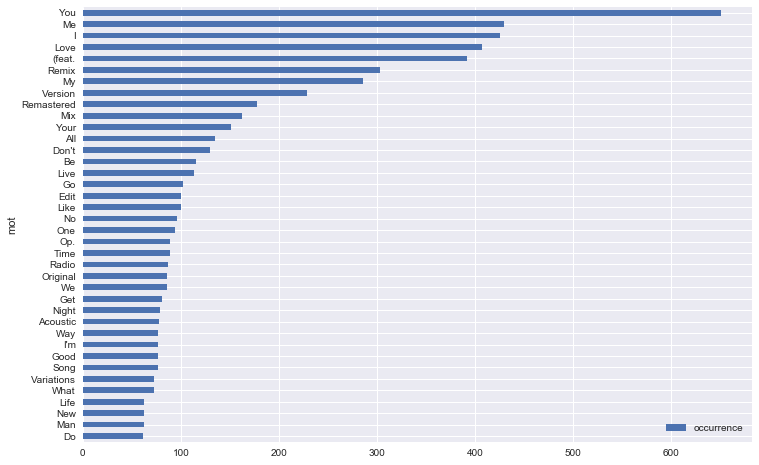

In [1019]:
compt_t.sort_values(by = "occurrence", inplace = True)
compt_t.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

Dans un premier temps, on étudie les mots des titres qui "catégorisent" les chansons. En effet, on remarque la présence récurrente de mots comme "feat." pour le featuring d'un artiste. Cela implique donc la présence d'un autre artiste en plus ; est-ce-que cela influence la popularité de la chanson ? De la même manière, la présence du mot "Remastered" peut être intéressante à étudier.

In [1020]:
# Quelques éléments pouvant influencer la popularité d'une chanson
train_ti = themes (train, ["(feat.", "Remix", "Remastered", "Original", "Op.", "Mix", "Radio", "Version", "Edit", "Variations"], "title", "elmt_title")
train_ti["elmt_title"].value_counts()

Aucun         8687
(feat.         350
Remix          295
Version        225
Mix            158
Edit            99
Remastered      96
Op.             84
Variations      13
Radio            9
Original         9
Name: elmt_title, dtype: int64

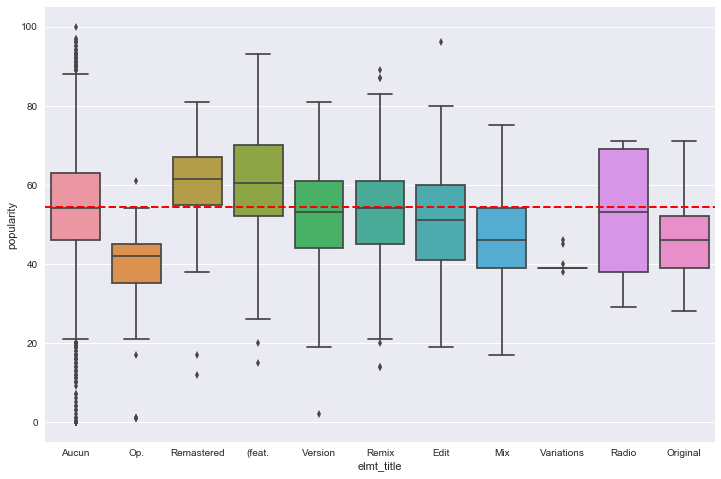

In [1021]:
# Boxplot éléments du titre et popularité
boxploter(train_ti, "elmt_title")

On remarque que :
* Les featurings sont plus populaires que la moyenne. La collaboration d'artistes rendrait populaire la chanson.
* Les remastered sont des chansons souvent déjà populaires, ce qui expliquerait leur popularité.
* Le "Op." est une caractéristique des titres des œuvres classiques. On retrouve bien le fait que les morceaux classiques sont moins populaires que les autres genres sur Spotify.

On étudie maintenant les autres mots des titres. On peut donc s'intéresser à l'idée / thème général du morceau.

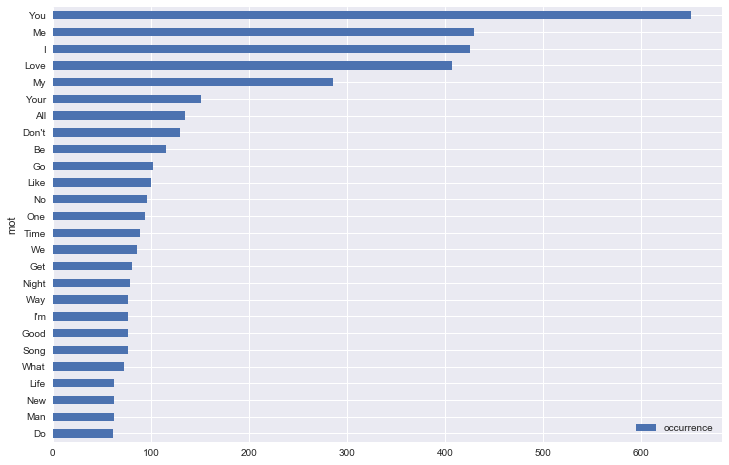

In [1060]:
# Des mots fréquents qui pourraient influencer la popularité d'une chanson
mots_traites = ["(feat.", "Remix", "Remastered", "Original", "Op.", "Mix", "Radio", "Version", "Live", "Edit", "Acoustic", "Variations"]
compt_motf = filtre_stop_word(compt_t, mots_traites)

compt_motf.sort_values(by = "occurrence", inplace = True)
compt_motf.plot(kind = "barh", sort_columns = True, figsize = (12, 8))

In [1061]:
train_fr = themes (train, compt_motf.index.values, "title", "fr_title")
train_fr["fr_title"].value_counts()

Aucun    7094
You       479
Me        379
Love      298
My        218
I         215
Your      107
Go         91
Be         80
Time       80
No         75
Song       73
Night      73
All        68
We         65
One        64
Life       62
Good       61
Like       61
Man        58
New        57
Way        57
Don't      56
Get        55
I'm        50
Do         32
What       17
Name: fr_title, dtype: int64

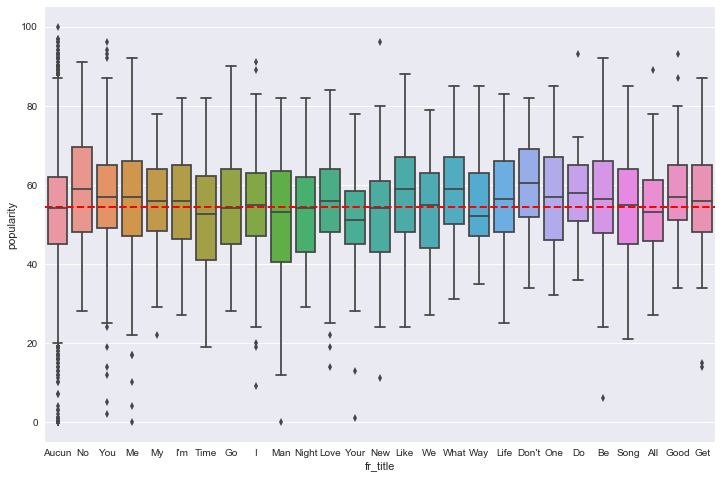

In [1062]:
# Boxplot mots fréquents du titre et popularité
boxploter(train_fr, "fr_title")

On constate que :
* La négation rend plus populaire la chanson (No, Don't).
* Les verbes n'influencent pas réellement la popularité (Go, ...) sauf lorsqu'ils expriment une idée sentimentale comme Like.

# Étude des artistes
On s'intéresse maintenant à l'influence des artistes sur la popularité de leurs chansons. Est-ce-que les chanteurs cités plusieurs fois, considérés comme plus populaires que les autres, chantent réellement des chansons populaires ?

In [1219]:
artist = train.groupby("artist")

# Nombre de fois que l'artiste est mentionné (doublon inclus)
train_c = artist.count()
train_a = artist.mean()
train_a["count_artist"] = train_c["key"]
train_a.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,count_artist
artist,,,,,,,,,,,,,,,
(Hed) P.E.,0.002190,0.666,240880.0,0.793000,0.000003,6.000000,0.079900,-6.028,1.000000,45.0,0.064700,96.047000,4.0,0.454,1
*NSYNC,0.020903,0.624,203200.0,0.905333,0.000353,7.666667,0.161633,-4.453,0.333333,62.0,0.051633,151.810667,4.0,0.813,3
*repeat repeat,0.042300,0.721,161537.0,0.750000,0.000000,6.000000,0.117000,-6.098,0.000000,41.0,0.037700,104.854000,4.0,0.749,1
.Sinh,0.589000,0.644,112786.0,0.258000,0.946000,7.000000,0.080700,-20.552,0.000000,52.0,0.053400,166.356000,4.0,0.207,1
03 Greedo,0.278000,0.830,238770.0,0.464000,0.000000,4.000000,0.312000,-8.375,0.000000,41.0,0.473000,172.014000,4.0,0.436,1


In [1220]:
train_a.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,count_artist
count,5365.000000,5365.000000,5.365000e+03,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000,5365.000000
mean,0.356451,0.565853,2.379456e+05,0.560368,0.215246,5.210686,0.167361,-9.503071,0.634755,52.156930,0.075210,118.490219,3.912171,0.419518,2.360485
std,0.347045,0.165993,1.086024e+05,0.263829,0.344763,3.209312,0.115537,5.630326,0.437885,11.900659,0.075631,26.180336,0.359739,0.241055,3.726400
min,0.000003,0.058000,5.647000e+04,0.000879,0.000000,0.000000,0.023400,-39.995000,0.000000,0.000000,0.023000,39.754000,1.000000,0.029200,1.000000
25%,0.040500,0.462000,1.929070e+05,0.365000,0.000004,2.333333,0.099100,-11.635000,0.000000,44.500000,0.035700,100.000000,4.000000,0.223000,1.000000
50%,0.222000,0.576000,2.209340e+05,0.594250,0.002115,5.000000,0.121000,-7.906000,1.000000,52.000000,0.046800,119.452000,4.000000,0.397000,1.000000
75%,0.667000,0.684000,2.563890e+05,0.774000,0.333000,7.789474,0.199500,-5.612189,1.000000,60.000000,0.075633,133.097333,4.000000,0.596200,2.000000
max,0.996000,0.978000,3.391040e+06,0.999000,0.992000,11.000000,0.964000,0.088000,1.000000,94.000000,0.765000,232.080000,5.000000,0.981000,66.000000


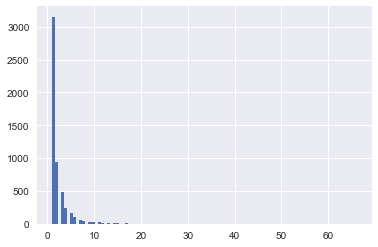

In [1221]:
train_a["count_artist"].hist(bins = 100)

Étudions les artistes mentionnés plusieurs fois. J'ai choisi arbitrairement de ne garder que les artistes mentionnés au moins 20 fois. Il s'agit d'un compromis entre réalisme et nombre d'artistes gardés en pratique.

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


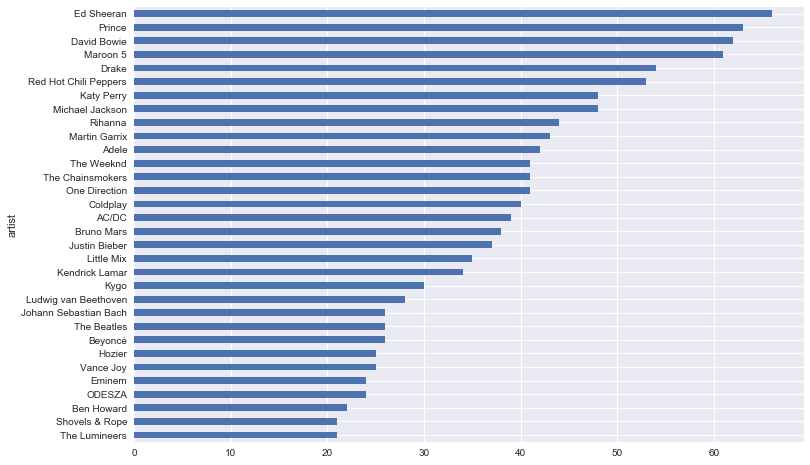

In [1222]:
# Étudier les artistes mentionnés plusieurs fois
train_art = train_a.loc[train_a["count_artist"] > 20]
train_ar = train_art[["popularity", "count_artist"]]

# Classement par "occurrence"
train_ar.sort_values(by = "count_artist", inplace = True)
train_ar["count_artist"].plot(kind = "barh", sort_columns = True, figsize = (12, 8))

Les trois chanteurs les plus récurrents sont David Bowie, Prince et Katy Perry. Seront-ils les trois chanteurs les plus populaires ?

/Users/okabeshu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


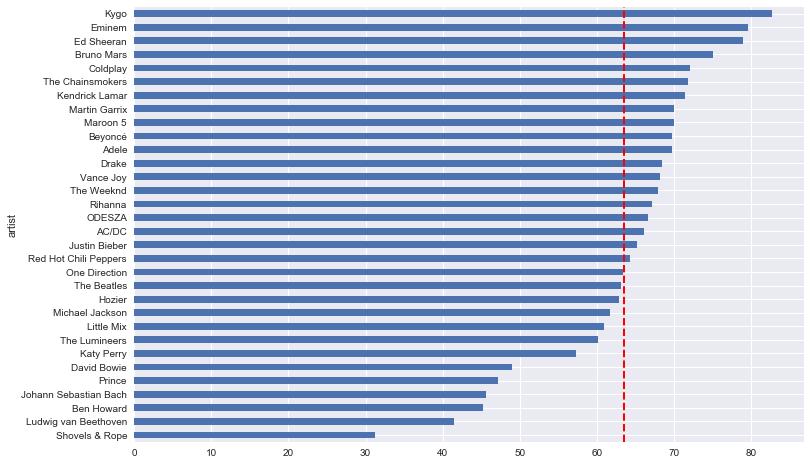

In [1223]:
# Classement par popularité
train_ar.sort_values(by = "popularity", inplace = True)
train_ar["popularity"].plot(kind = "barh", sort_columns = True, figsize = (12, 8))
plt.axvline(train_ar["popularity"].mean(), color  = "r", linestyle = "dashed", linewidth = 2)

On constate ici que le fait d'être cité plusieurs fois n'est pas un gage de popularité. En effet :
* Les trois chanteurs David Bowie, Prince et Katy Perry sont cette fois associés aux chansons moins populaires que la moyenne.
* Les compositeurs classiques (Bach, Beethoven et Rachmaninoff) sont associés à des chansons très peu populaires sur Spotify, comme l'était le genre "Classical".
* La pop est populaire comme observé avec les genres : les quatre premiers artistes sont des chanteurs pop.

In [1224]:
artists_compl = list(train_ar.index.values) # Tous les artistes les plus récurrents

train_ar_d = train_ar[train_ar["popularity"] > train_ar["popularity"].quantile(0.60)]
artists = list(train_ar_d.index.values) # Les artistes les plus récurrents et les plus populaires
print(artists)

['Vance Joy', 'Drake', 'Adele', 'Beyoncé', 'Maroon 5', 'Martin Garrix', 'Kendrick Lamar', 'The Chainsmokers', 'Coldplay', 'Bruno Mars', 'Ed Sheeran', 'Eminem', 'Kygo']


In [1225]:
# Ne garder que les artistes les plus populaires parmi tous les artistes
def artiste_pop (donnees, artists) :
    data = donnees.copy()
    for index, ligne in data.iterrows() :
        artist = ligne["artist"]
        if artist not in artists : 
            data.at[index, "artist"] = "Artiste"
    return data

train_artiste = artiste_pop(train, artists)
train_artiste["artist"].value_counts()

Artiste             12140
Ed Sheeran             66
Maroon 5               61
Drake                  54
Martin Garrix          43
Adele                  42
The Chainsmokers       41
Coldplay               40
Bruno Mars             38
Kendrick Lamar         34
Kygo                   30
Beyoncé                26
Vance Joy              25
Eminem                 24
Name: artist, dtype: int64

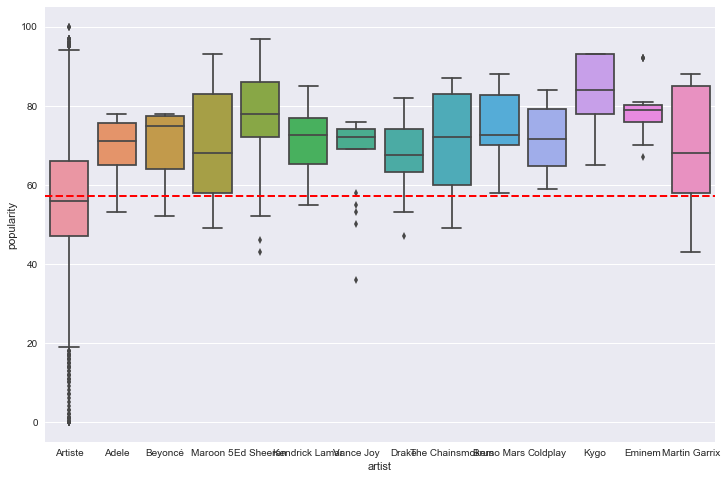

In [1226]:
# Boxplot artiste populaire et popularité
boxploter(train_artiste, "artist")

# Matrice de corrélation

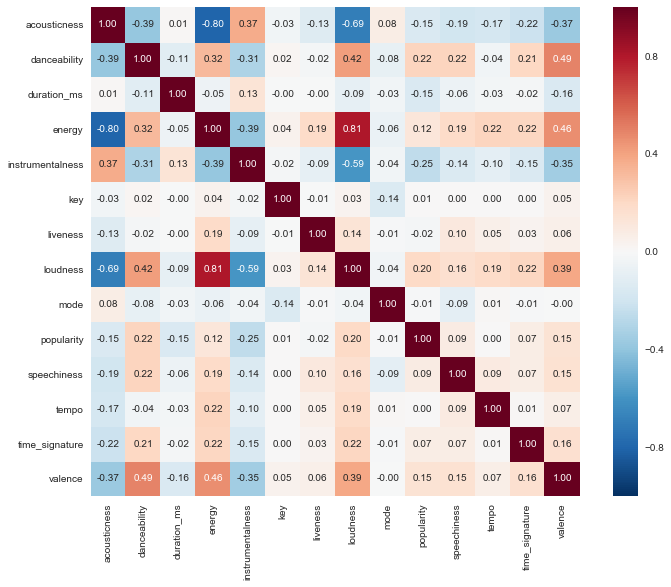

In [1119]:
matrice = train_sauve.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(matrice, cbar = True, annot = True, square = True, fmt = ".2f")

# Traitement final de la base de données

In [1227]:
def traiter (donnees, artists) : 
    data = themes(creer_repet(donnees), genres, "playlist_name", "genre")
    df = nettoyer(data)
    data = df.drop(["repet", "genre_Classical", "genre_Country", "genre_Folk", "genre_Indie", 
                        "genre_Jazz", "genre_Metal", "genre_Pop", "genre_Rock"], axis = 1)
    data = themes(creer_repet(data), genres, "playlist_name", "genre")
    data = themes(data, ["Piano", "Chill", "All", "Party", "Sleep", "Hits"], "playlist_name", "themes") # Ajouter les thèmes
    data["log_duration_ms"] = np.log(data["duration_ms"]) # Log de la durée
    df = themes(data, ["Like", "Your", "One", "No", "Don't", "Mix", "Remastered", "(feat."], "title", "elmt_title")
    data = df.drop(["duration_ms", "uri", "playlist_name", "title"], axis = 1)
    if len(artists) == 0 : # Traitement sans les artistes
        data = data.drop("artist", axis = 1)
        data = pd.get_dummies(data)
        data = data.drop(["themes_Aucun", "genre_Aucun", "elmt_title_Aucun"], axis = 1)
    else : # Traitement avec les artistes les plus récurrents
        data = artiste_pop(data, artists)
        data = pd.get_dummies(data)
        data = data.drop(["themes_Aucun", "genre_Aucun", "artist_Artiste", "elmt_title_Aucun"], axis = 1)
    return data

trained = traiter(train_sauve, []) # Sans les artistes
trained.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,...,themes_Piano,themes_Sleep,elmt_title_(feat.,elmt_title_Don't,elmt_title_Like,elmt_title_Mix,elmt_title_No,elmt_title_One,elmt_title_Remastered,elmt_title_Your
6860,0.672000,0.439,0.333,0.049600,6,0.0925,-11.551,1,31,0.0311,...,0,0,0,0,0,0,0,0,0,0
3214,0.950000,0.445,0.407,0.000000,3,0.2270,-6.883,1,66,0.0349,...,0,0,0,0,0,0,0,0,0,0
8234,0.000153,0.258,0.858,0.000035,4,0.1100,-4.756,1,21,0.0596,...,0,0,0,0,0,0,0,0,0,0
16112,0.060900,0.551,0.681,0.118000,0,0.0491,-8.216,1,34,0.0477,...,0,0,0,0,0,0,0,0,0,0
12463,0.006350,0.653,0.561,0.002780,8,0.0692,-4.679,1,50,0.0640,...,0,0,0,0,0,0,0,0,0,0


In [1228]:
trained_art = traiter(train_sauve, artists_compl) # Avec les artistes
trained_art.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,...,themes_Piano,themes_Sleep,elmt_title_(feat.,elmt_title_Don't,elmt_title_Like,elmt_title_Mix,elmt_title_No,elmt_title_One,elmt_title_Remastered,elmt_title_Your
6860,0.672000,0.439,0.333,0.049600,6,0.0925,-11.551,1,31,0.0311,...,0,0,0,0,0,0,0,0,0,0
3214,0.950000,0.445,0.407,0.000000,3,0.2270,-6.883,1,66,0.0349,...,0,0,0,0,0,0,0,0,0,0
8234,0.000153,0.258,0.858,0.000035,4,0.1100,-4.756,1,21,0.0596,...,0,0,0,0,0,0,0,0,0,0
16112,0.060900,0.551,0.681,0.118000,0,0.0491,-8.216,1,34,0.0477,...,0,0,0,0,0,0,0,0,0,0
12463,0.006350,0.653,0.561,0.002780,8,0.0692,-4.679,1,50,0.0640,...,0,0,0,0,0,0,0,0,0,0


# Prédictions sans artiste

In [1229]:
tested = traiter(test, [])
train_pop = trained["popularity"]
train_var = trained.drop("popularity", axis = 1)
test_var = tested.drop("popularity", axis = 1).copy()
test_pop = tested["popularity"]
train_pop.shape, train_var.shape, test_var.shape

((10041,), (10041, 36), (3832, 36))

## Régression linéaire sans artiste

In [1230]:
reg = linear_model.LinearRegression()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

def coef_interpretation(variables, coef):
    dic = {}
    for i in range(len(coef)):
        dic.update({variables[i]:coef[i]})
    return dic

coef_interpretation(list(train_var),reg.coef_)

{'acousticness': -2.0242665139460514,
 'danceability': 7.1539742204013166,
 'elmt_title_(feat.': 3.4715411486378582,
 "elmt_title_Don't": 1.5764139304921152,
 'elmt_title_Like': 1.8676495247798168,
 'elmt_title_Mix': -7.3460072943439725,
 'elmt_title_No': 2.3930549790486375,
 'elmt_title_One': 0.27232057824801603,
 'elmt_title_Remastered': 2.6571115891437396,
 'elmt_title_Your': -2.8691539523425096,
 'energy': -7.5609573160581656,
 'genre_Classical': -11.36018106744107,
 'genre_Country': 4.8298317055239819,
 'genre_Folk': -5.4519579948713561,
 'genre_Indie': -3.2927754976432886,
 'genre_Jazz': -1.7875184822490375,
 'genre_Metal': 4.2368749511108383,
 'genre_Pop': 6.0450760174522475,
 'genre_Rock': 3.0739777538071991,
 'instrumentalness': -4.7141970809182112,
 'key': -0.021126430142966002,
 'liveness': -2.5667865653693802,
 'log_duration_ms': -1.181310868795979,
 'loudness': 0.23114206100460954,
 'mode': -0.23356773049650303,
 'repet': -3.5527136788005009e-15,
 'speechiness': 5.98308382

In [1231]:
# Calcul du R^2
R2_lin_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_lin_sans = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_lin_sans = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_lin_sans, "; MSE =", mse_lin_sans, "; MAE = ", mae_lin_sans)

R2 = 0.168266899356 ; MSE = 151.921733447 ; MAE =  9.65630778472


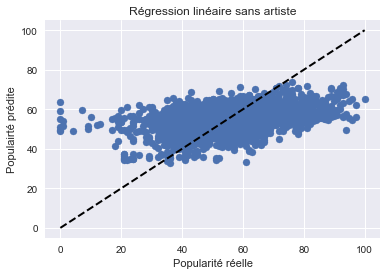

In [1232]:
# Graphique
def grapher (reel, predict, titre) :
    fig, ax = plt.subplots()
    ax.scatter(reel, predict)
    ax.plot([reel.min(), reel.max()], [reel.min(), reel.max()], "k--", linewidth = 2)
    ax.set_xlabel("Popularité réelle")
    ax.set_ylabel("Populairté prédite")
    plt.title(titre)
    
grapher(test_pop, pop_predict, "Régression linéaire sans artiste")

## kNN sans artiste

In [1233]:
reg = KNeighborsRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_knn_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_knn_sans = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_knn_sans = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_knn_sans, "; MSE =", mse_knn_sans, "; MAE = ", mae_knn_sans)

R2 = 0.091391564329 ; MSE = 165.963538622 ; MAE =  10.2489039666


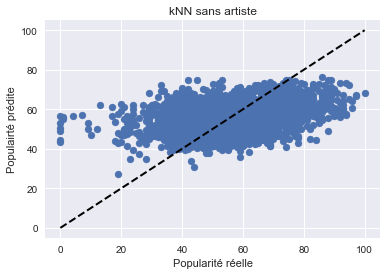

In [1234]:
grapher(test_pop, pop_predict, "kNN sans artiste")

## Random Forest sans artiste

In [1235]:
reg = RandomForestRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_ranfor_sans = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_ranfor_sans = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_ranfor_sans = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_ranfor_sans, "; MSE =", mse_ranfor_sans, "; MAE = ", mae_ranfor_sans)

R2 = 0.353286679923 ; MSE = 118.126606424 ; MAE =  8.1241953723


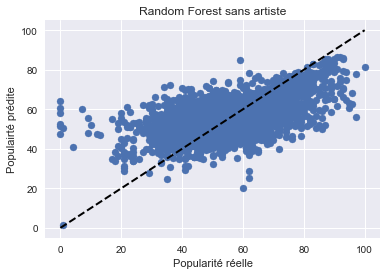

In [1236]:
grapher(test_pop, pop_predict, "Random Forest sans artiste")

# Prédictions avec artistes

In [1237]:
tested_art = traiter(test, artists_compl)
train_pop = trained_art["popularity"]
train_var = trained_art.drop("popularity", axis = 1)
test_var = tested_art.drop("popularity", axis = 1).copy()
test_pop = tested_art["popularity"]
train_pop.shape, train_var.shape, test_var.shape

((10041,), (10041, 68), (3832, 68))

## Régression linéaire avec artistes

In [1238]:
reg = linear_model.LinearRegression()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

coef_interpretation(list(train_var),reg.coef_)

{'acousticness': -1.690750801593683,
 'artist_AC/DC': 10.035297704115584,
 'artist_Adele': 8.7824833029285063,
 'artist_Ben Howard': -10.558354385082632,
 'artist_Beyoncé': 10.469160045546991,
 'artist_Bruno Mars': 16.506458545294308,
 'artist_Coldplay': 14.997650875510761,
 'artist_David Bowie': -7.6932701544999063,
 'artist_Drake': 9.0643578324010932,
 'artist_Ed Sheeran': 17.836706252557057,
 'artist_Eminem': 20.23154755039408,
 'artist_Hozier': 5.2292161003172044,
 'artist_Johann Sebastian Bach': -2.1424723680372302,
 'artist_Justin Bieber': 6.7652596414912294,
 'artist_Katy Perry': 1.9318994413085402,
 'artist_Kendrick Lamar': 10.899634372165757,
 'artist_Kygo': 20.100997918458877,
 'artist_Little Mix': 5.56419778021161,
 'artist_Ludwig van Beethoven': -5.9880661578901293,
 'artist_Maroon 5': 6.60573952524157,
 'artist_Martin Garrix': 11.024116942553716,
 'artist_Michael Jackson': 5.4749191513566728,
 'artist_ODESZA': 10.838786138490782,
 'artist_One Direction': 8.4903748529913265

In [1239]:
# R^2
R2_lin_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_lin_avec = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_lin_avec = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_lin_avec, "; MSE =", mse_lin_avec, "; MAE = ", mae_lin_avec)

R2 = 0.217374941091 ; MSE = 142.951814106 ; MAE =  9.29883698925


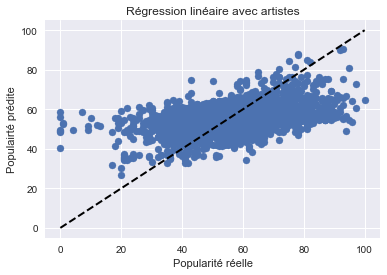

In [1240]:
grapher(test_pop, pop_predict, "Régression linéaire avec artistes")

## kNN avec artistes

In [1241]:
reg = KNeighborsRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)
reg.get_params()

# R^2
R2_knn_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_knn_avec = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_knn_avec = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_knn_avec, "; MSE =", mse_knn_avec, "; MAE = ", mae_knn_avec)

R2 = 0.0836592552554 ; MSE = 167.375897704 ; MAE =  10.3441022965


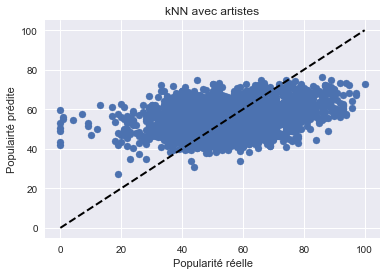

In [1242]:
grapher(test_pop, pop_predict, "kNN avec artistes")

## Random Forest avec artistes

In [1243]:
reg = RandomForestRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_ranfor_avec = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_ranfor_avec = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_ranfor_avec = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_ranfor_avec, "; MSE =", mse_ranfor_avec, "; MAE = ", mae_ranfor_avec)

R2 = 0.379974912553 ; MSE = 113.251818393 ; MAE =  7.99399666965


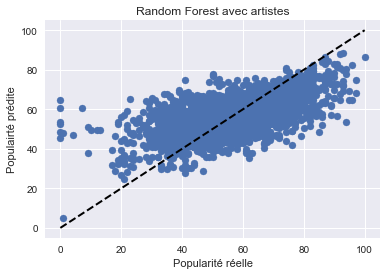

In [1244]:
grapher(test_pop, pop_predict, "Random Forest avec artistes")

# Résultats de chaque modèle

In [1245]:
modeles = pd.DataFrame({
    "Model" : ["Régression linéaire sans", "kNN sans", "Random Forest sans", 
              "Régression linéaire avec", "kNN avec", "Random Forest avec"],
    "R2" : [R2_lin_sans, R2_knn_sans, R2_ranfor_sans, 
            R2_lin_avec, R2_knn_avec, R2_ranfor_avec],
    "MSE" : [mse_lin_sans, mse_knn_sans, mse_ranfor_sans,
             mse_lin_avec, mse_knn_avec, mse_ranfor_avec],
    "MAE" : [mae_lin_sans, mae_knn_sans, mae_ranfor_sans,
             mae_lin_avec, mae_knn_avec, mae_ranfor_avec]})
modeles = modeles[["Model", "R2", "MSE", "MAE"]]
modeles.sort_values(by = "R2", ascending = False)

,Model,R2,MSE,MAE
5,Random Forest avec,0.379975,113.251818,7.993997
2,Random Forest sans,0.353287,118.126606,8.124195
3,Régression linéaire avec,0.217375,142.951814,9.298837
0,Régression linéaire sans,0.168267,151.921733,9.656308
1,kNN sans,0.091392,165.963539,10.248904
4,kNN avec,0.083659,167.375898,10.344102


# Étude de toutes les chansons

In [1211]:
# Random Forest avec les artistes
essai_t = traiter(spotify_t, artists_compl)
train_pop = trained_art["popularity"]
train_var = trained_art.drop("popularity", axis = 1)
test_var = essai_t.drop("popularity", axis = 1).copy()
test_pop = essai_t["popularity"]
train_pop.shape, train_var.shape, test_var.shape

((10025,), (10025, 59), (12661, 59))

In [1212]:
reg = RandomForestRegressor()
reg.fit(train_var, train_pop)
pop_predict = reg.predict(test_var)

# R^2
R2_ranfor_essai = reg.score(test_var, test_pop)
# Calcul de l'erreur quadratique moyenne
mse_ranfor_essai = mean_squared_error(test_pop, pop_predict)
# Calcul de l'erreur absolue moyenne
mae_ranfor_essai = mean_absolute_error(test_pop, pop_predict)
print("R2 =", R2_ranfor_essai, "; MSE =", mse_ranfor_essai, "; MAE =", mae_ranfor_essai)

R2 = 0.703624474647 ; MSE = 48.8587002108 ; MAE = 4.78973501303


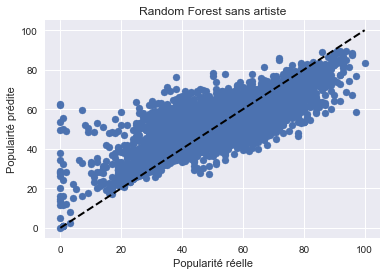

In [1213]:
grapher(test_pop, pop_predict, "Random Forest sans artiste")

In [1214]:
# Tableau récapitulatif : Top chansons
ess = creer_repet (spotify_t) # Identifier les chansons doublons
ess = themes(ess, genres, "playlist_name", "genre") # Ajouter les genres
df = nettoyer(ess)
df["pred"] = pop_predict
ess1 = df[["title", "artist", "popularity", "pred"]] # Améliorer la lisibilité du tableau
ess1.head()

,title,artist,popularity,pred
12432,Là-haut,L'Impératrice,48,40.8
3259,Lucky,Jason Mraz,75,74.0
3260,Lay Me Down,Sam Smith,74,72.6
3262,This Town,Niall Horan,70,77.0
3263,Fix You,Coldplay,81,73.9


In [1215]:
# Les chansons réeellement populaires
ess1.sort_values(by = "popularity", ascending = False).head(10)

,title,artist,popularity,pred
8888,Havana,Camila Cabello,100,83.6
16064,rockstar,Post Malone,97,58.4
3196,Perfect,Ed Sheeran,97,76.8
12663,Dusk Till Dawn - Radio Edit,ZAYN,96,88.1
45,Silence,Marshmello,96,88.3
16024,New Rules,Dua Lipa,96,87.5
9570,All I Want for Christmas Is You,Mariah Carey,96,67.2
16031,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,95,81.4
16027,Wolves,Selena Gomez,95,74.1
16046,Let You Down,NF,94,68.9


In [1216]:
# Les chansons populaires selon les prédictions
ess1.sort_values(by = "pred", ascending = False).head(10)

,title,artist,popularity,pred
683,Young Dumb & Broke,Khalid,94,89.450000
32,Ric Flair Drip (& Metro Boomin),Offset,92,89.400000
2105,XO TOUR Llif3,Lil Uzi Vert,91,89.400000
37,Corazón,Maluma,92,89.200000
8890,Shape of You,Ed Sheeran,86,88.833333
18,No Limit,G-Eazy,91,88.400000
45,Silence,Marshmello,96,88.300000
2234,Bodak Yellow,Cardi B,90,88.300000
12663,Dusk Till Dawn - Radio Edit,ZAYN,96,88.100000
16024,New Rules,Dua Lipa,96,87.500000


L'algorithme a bien prédit la présence de quelques chansons dans le Top 10.